In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

import ai2thor
import ai2thor_colab
from ai2thor_colab import plot_frames, side_by_side
from ai2thor.controller import Controller

from IPython.display import clear_output

In [2]:
from ai2thor.platform import CloudRendering
controller = Controller(platform=CloudRendering)

## Workspace

In [3]:
def show_object_detected(controller):

    data = controller.last_event.metadata['objects']

    df_data = pd.DataFrame(data)

    df_object = df_data[(df_data['name'] == 'Toaster_f745e839') | (df_data['name'] == 'CoffeeMachine_d7084e0d') | 
                        (df_data['name'] == 'Microwave_e71f2758') | (df_data['name'] == 'Fridge_22a96a15') | 
                        (df_data['name'] == 'LightSwitch_887b121a') | (df_data['name'] == 'Tomato_e65a6e2e')]
    
    print('Object detected:')
    print(dict(df_object['name'][df_object['visible'] == True]))

In [4]:
floor_index = random.randint(0, 30)
floor_index = "_Train5_5"

controller = Controller(
    agentMode = "locobot", # default, locobot, arm
    visibilityDistance = 0.75,
    scene = f"FloorPlan{floor_index}",

    # step sizes
    gridSize = 0.25,
    snapToGrid = True,
    rotateStepDegrees = 90,

    # image modalitiesB
    renderInstanceSegmentation = False,
    renderDepthImage = False,
    renderSemanticSegmentation = False,
    renderNormalsImage = False,
    
    # camera properties
    width = 1200,
    height = 800,
    fieldOfView = 120
)

In [5]:
w = "MoveAhead"
a = "MoveLeft"
s = "MoveBack"
d = "MoveRight"

l = "RotateLeft"
r = "RotateRight"

In [6]:
data = controller.last_event.metadata['objects']
df_data = pd.DataFrame(data)

Agent position:
{'x': 3.75, 'y': 0.9009996652603149, 'z': -1.75}
Object detected:
{}


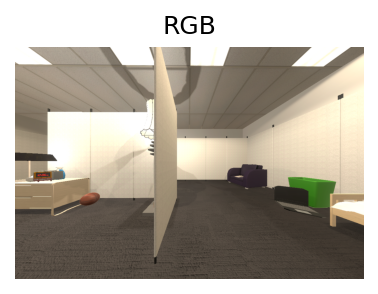

In [13]:
command = l

event = controller.step(command)
agent_position = event.metadata["agent"]["position"]

print("Agent position:")
print(agent_position)
show_object_detected(controller)

plot_frames(controller.last_event)

---

In [8]:
metadata = event.metadata
list(metadata.keys())

['objects',
 'isSceneAtRest',
 'agent',
 'heldObjectPose',
 'arm',
 'fov',
 'cameraPosition',
 'cameraOrthSize',
 'thirdPartyCameras',
 'collided',
 'collidedObjects',
 'inventoryObjects',
 'sceneName',
 'lastAction',
 'errorMessage',
 'errorCode',
 'lastActionSuccess',
 'screenWidth',
 'screenHeight',
 'agentId',
 'depthFormat',
 'colors',
 'flatSurfacesOnGrid',
 'distances',
 'normals',
 'isOpenableGrid',
 'segmentedObjectIds',
 'objectIdsInBox',
 'actionIntReturn',
 'actionFloatReturn',
 'actionStringsReturn',
 'actionFloatsReturn',
 'actionVector3sReturn',
 'visibleRange',
 'currentTime',
 'sceneBounds',
 'actionReturn']

In [9]:
scene_name = event.metadata["sceneName"]
scene_bounds = event.metadata["sceneBounds"]
print(f"Scene name: {scene_name}, Scene bounds: X = {scene_bounds['size']['x']}, Y = {scene_bounds['size']['y']}")

Scene name: FloorPlan_Train5_5, Scene bounds: X = 9.75999927520752, Y = 2.6211209297180176


In [10]:
objects = controller.last_event.metadata['objects']
print(f"Total objects: {len(objects)}")

Total objects: 46


In [11]:
objects

[{'name': 'AlarmClock_14ea99dc',
  'position': {'x': 6.07647705078125,
   'y': 0.5349957346916199,
   'z': -2.9928765296936035},
  'rotation': {'x': 0.15739284455776215,
   'y': 338.8146667480469,
   'z': 0.2314399778842926},
  'visible': False,
  'isInteractable': False,
  'receptacle': False,
  'toggleable': False,
  'isToggled': False,
  'breakable': False,
  'isBroken': False,
  'canFillWithLiquid': False,
  'isFilledWithLiquid': False,
  'fillLiquid': None,
  'dirtyable': False,
  'isDirty': False,
  'canBeUsedUp': False,
  'isUsedUp': False,
  'cookable': False,
  'isCooked': False,
  'temperature': 'RoomTemp',
  'isHeatSource': False,
  'isColdSource': False,
  'sliceable': False,
  'isSliced': False,
  'openable': False,
  'isOpen': False,
  'openness': 0.0,
  'pickupable': True,
  'isPickedUp': False,
  'moveable': False,
  'mass': 0.800000011920929,
  'salientMaterials': ['Metal', 'Plastic', 'Glass'],
  'receptacleObjectIds': None,
  'distance': 2.6629300117492676,
  'objectT

In [12]:
def encode_feedback(event, controller, target_name):
    
    agent_position = event.metadata["agent"]["position"]
    data = controller.last_event.metadata['objects']
    
    index_location = next((index for index, item in enumerate(data) if item['name'] == target_name), None)
    is_found = data[index_location]['visible']
    
    if is_found:
        reward = +10
    else:
        reward = -0.05
    
    return None, random.random(), is_found, None

---